In [145]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import os
import numpy as np
from scipy.stats import linregress
import gmaps


In [146]:
happiness_path = os.path.join("Downloads", "HappinessAlcoholConsumption.csv")
income_path = os.path.join("Downloads", "countries_income_group.csv")

In [147]:
happiness_study_df = pd.read_csv(happiness_path)
income_study_df = pd.read_csv(income_path, index_col=[0])

In [148]:
income_study_df.rename(columns = {'Economy' : 'Country'}, inplace = True)

In [149]:
alcohol_study = pd.merge(happiness_study_df, income_study_df, on = "Country")

alcohol_study.head(10)

,Country,Region_x,Hemisphere,HappinessScore,HDI,GDP_PerCapita,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita,Code,Region_y,Income group
0,Denmark,Western Europe,north,7.526,928,53579.0,224,81,278,DNK,Europe & Central Asia,High income
1,Switzerland,Western Europe,north,7.509,943,79866.0,185,100,280,CHE,Europe & Central Asia,High income
2,Iceland,Western Europe,north,7.501,933,60530.0,233,61,78,ISL,Europe & Central Asia,High income
3,Norway,Western Europe,north,7.498,951,70890.0,169,71,129,NOR,Europe & Central Asia,High income
4,Finland,Western Europe,north,7.413,918,43433.0,263,133,97,FIN,Europe & Central Asia,High income
5,Canada,North America,north,7.404,922,42349.0,240,122,100,CAN,North America,High income
6,Netherlands,Western Europe,north,7.339,928,45638.0,251,88,190,NLD,Europe & Central Asia,High income
7,New Zealand,Australia and New Zealand,south,7.334,915,40332.0,203,79,175,NZL,East Asia & Pacific,High income
8,Australia,Australia and New Zealand,south,7.313,938,49897.0,261,72,212,AUS,East Asia & Pacific,High income
9,Sweden,Western Europe,north,7.291,932,51845.0,152,60,186,SWE,Europe & Central Asia,High income


In [150]:
final_alcohol = alcohol_study.drop(columns=['Code', 'Region_y'])
final_alcohol.set_index('Country')

,Region_x,Hemisphere,HappinessScore,HDI,GDP_PerCapita,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita,Income group
Country,,,,,,,,,
Denmark,Western Europe,north,7.526,928,53579.0,224,81,278,High income
Switzerland,Western Europe,north,7.509,943,79866.0,185,100,280,High income
Iceland,Western Europe,north,7.501,933,60530.0,233,61,78,High income
Norway,Western Europe,north,7.498,951,70890.0,169,71,129,High income
Finland,Western Europe,north,7.413,918,43433.0,263,133,97,High income
...,...,...,...,...,...,...,...,...,...
Madagascar,Sub-Saharan Africa,south,3.695,517,402.0,26,15,4,Low income
Tanzania,Sub-Saharan Africa,south,3.666,533,878.0,36,6,1,Low income
Liberia,Sub-Saharan Africa,north,3.622,432,455.0,19,152,2,Low income


In [151]:
beer = final_alcohol['Beer_PerCapita'].mean()
spirit = final_alcohol['Spirit_PerCapita'].mean()
wine = final_alcohol['Wine_PerCapita'].mean()

In [152]:
print(beer)
print(spirit)
print(wine)

141.25892857142858
100.07142857142857
70.27678571428571


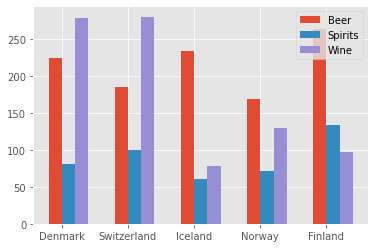

In [153]:
#USE THIS CODE/GRAPH FOR QUESTION TWO
top5 = final_alcohol.loc[final_alcohol['HappinessScore']>7.41]

x_axis = np.arange(len(top5['Country']))

plt.bar(x_axis -.10, top5['Beer_PerCapita'], width=0.2, label = 'Beer')
plt.bar(x_axis +.10, top5['Spirit_PerCapita'], width=0.2, label = 'Spirits')
plt.bar(x_axis +.10*3, top5['Wine_PerCapita'], width=0.2, label = 'Wine')

plt.xticks(x_axis, top5['Country'])

plt.legend()

plt.show()

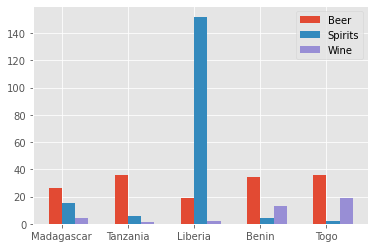

In [154]:
#USE THIS CODE/GRAPH FOR QUESTION TWO
bottom5 = final_alcohol.loc[final_alcohol['HappinessScore']<=3.7]

x_axis = np.arange(len(bottom5['Country']))

plt.bar(x_axis -.10, bottom5['Beer_PerCapita'], width=0.2, label = 'Beer')
plt.bar(x_axis +.10, bottom5['Spirit_PerCapita'], width=0.2, label = 'Spirits')
plt.bar(x_axis +.10*3, bottom5['Wine_PerCapita'], width=0.2, label = 'Wine')

plt.xticks(x_axis, bottom5['Country'])

plt.legend()

plt.show()

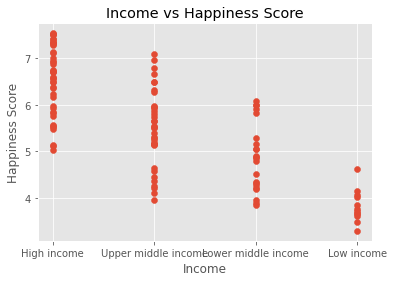

In [155]:
plt.scatter(final_alcohol.iloc[:,9],final_alcohol.iloc[:,3])

# Add labels and title to plot
plt.xlabel("Income")
plt.ylabel("Happiness Score")
plt.title('Income vs Happiness Score')

# Display plot
plt.show()

The correlation between GDP per Capita and Happiness Score is 0.72.


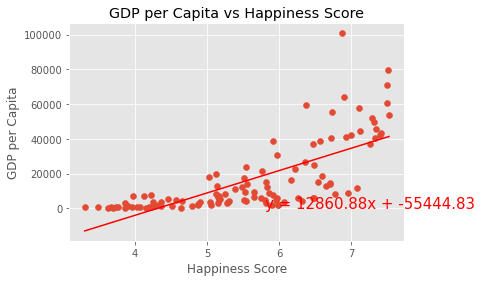

In [157]:
#USE THIS CODE/GRAPH FOR QUESTION THREE(PART 2) - ANTHONY'S CODE (SCATTORPLOT) WILL BE PART 1

# Calculate the correlation coefficient and linear regression model 
# for GDP per Capita and HappinessScore

GDP_per = final_alcohol.iloc[:,5]
Happiness_score = final_alcohol.iloc[:,3]
correlation = st.pearsonr(GDP_per,Happiness_score)
print(f"The correlation between GDP per Capita and Happiness Score is {round(correlation[0],2)}.")


# Calculate linear regression
x_values = final_alcohol['HappinessScore']
y_values = final_alcohol['GDP_PerCapita']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

# Add labels and title to plot
plt.xlabel("Happiness Score")
plt.ylabel("GDP per Capita")
plt.title('GDP per Capita vs Happiness Score')
plt.show()

The correlation between GDP per Capita and Beer Per Capita is 0.37.


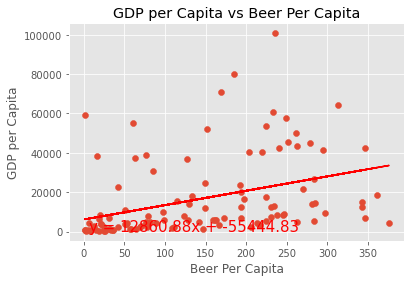

In [158]:
#USE THIS CODE/GRAPH FOR QUESTION FOUR

GDP_per = final_alcohol.iloc[:,5]
Beer_score = final_alcohol.iloc[:,6]
correlation = st.pearsonr(GDP_per,Beer_score)
print(f"The correlation between GDP per Capita and Beer Per Capita is {round(correlation[0],2)}.")


# Calculate linear regression
x_values = final_alcohol['Beer_PerCapita']
y_values = final_alcohol['GDP_PerCapita']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

# Add labels and title to plot
plt.xlabel("Beer Per Capita")
plt.ylabel("GDP per Capita")
plt.title('GDP per Capita vs Beer Per Capita')
plt.show()

The correlation between GDP per Capita and Wine Per Capita is 0.58.


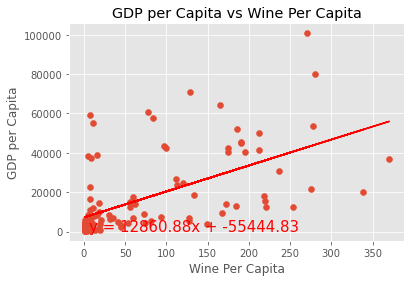

In [159]:
#USE THIS CODE/GRAPH FOR QUESTION FOUR

GDP_per = final_alcohol.iloc[:,5]
Wine_score = final_alcohol.iloc[:,8]
correlation = st.pearsonr(GDP_per,Wine_score)
print(f"The correlation between GDP per Capita and Wine Per Capita is {round(correlation[0],2)}.")


# Calculate linear regression
x_values = final_alcohol['Wine_PerCapita']
y_values = final_alcohol['GDP_PerCapita']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

# Add labels and title to plot
plt.xlabel("Wine Per Capita")
plt.ylabel("GDP per Capita")
plt.title('GDP per Capita vs Wine Per Capita')
plt.show()

The correlation between GDP per Capita and Spirit Per Capita is 0.05.


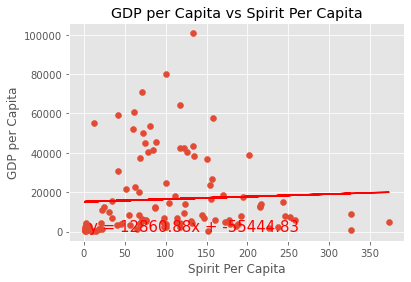

In [161]:
#USE THIS CODE/GRAPH FOR QUESTION FOUR 

GDP_per = final_alcohol.iloc[:,5]
Spirit_score = final_alcohol.iloc[:,7]
correlation = st.pearsonr(GDP_per,Spirit_score)
print(f"The correlation between GDP per Capita and Spirit Per Capita is {round(correlation[0],2)}.")


# Calculate linear regression
x_values = final_alcohol['Spirit_PerCapita']
y_values = final_alcohol['GDP_PerCapita']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

# Add labels and title to plot
plt.xlabel("Spirit Per Capita")
plt.ylabel("GDP per Capita")
plt.title('GDP per Capita vs Spirit Per Capita')
plt.show()

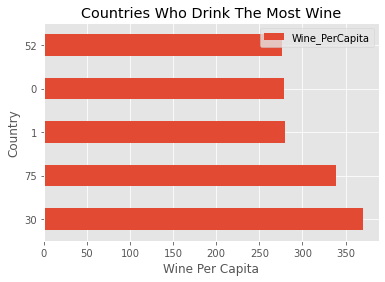

In [98]:
wine_country = final_alcohol.sort_values(by="Wine_PerCapita", ascending=False)
wine_country_final = wine_country.drop(columns = ['HappinessScore', 'HDI', 'GDP_PerCapita', 'Beer_PerCapita', 'Spirit_PerCapita'])

plt.style.use('ggplot')

wine_country_final.head(5).plot.barh()

plt.title('Countries Who Drink The Most Wine')
plt.ylabel('Country')
plt.xlabel('Wine Per Capita')
plt.show()


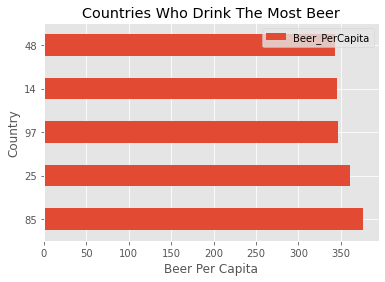

In [99]:
beer_country = final_alcohol.sort_values(by="Beer_PerCapita", ascending=False)
beer_country_final = beer_country.drop(columns = ['HappinessScore', 'HDI', 'GDP_PerCapita', 'Wine_PerCapita', 'Spirit_PerCapita'])

plt.style.use('ggplot')

beer_country_final.head(5).plot.barh()

plt.title('Countries Who Drink The Most Beer')
plt.ylabel('Country')
plt.xlabel('Beer Per Capita')
plt.show()


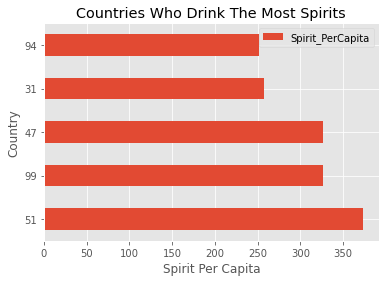

In [100]:
spirit_country = final_alcohol.sort_values(by="Spirit_PerCapita", ascending=False)
spirit_country_final = spirit_country.drop(columns = ['HappinessScore', 'HDI', 'GDP_PerCapita', 'Wine_PerCapita', 'Beer_PerCapita']) 
                                           
plt.style.use('ggplot')

spirit_country_final.head(5).plot.barh()

plt.title('Countries Who Drink The Most Spirits')
plt.ylabel('Country')
plt.xlabel('Spirit Per Capita')
plt.show()
